<a href="https://colab.research.google.com/github/hwangsaeyeon/AAI-Web-Development/blob/main/DNN_predict_victory(underfitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
import pandas as pd

x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)

y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)

In [253]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      5440 non-null   float64
 1   A1      5448 non-null   float64
 2   A2      5449 non-null   float64
 3   A3      5449 non-null   float64
 4   A4      5420 non-null   float64
 5   A5      5443 non-null   float64
 6   A6      5448 non-null   float64
 7   A7      5442 non-null   float64
 8   A8      5444 non-null   float64
 9   A9      5432 non-null   float64
 10  H0      5445 non-null   float64
 11  H1      5445 non-null   float64
 12  H2      5449 non-null   float64
 13  H3      5447 non-null   float64
 14  H4      5430 non-null   float64
 15  H5      5447 non-null   float64
 16  H6      5446 non-null   float64
 17  H7      5445 non-null   float64
 18  H8      5443 non-null   float64
 19  H9      5438 non-null   float64
dtypes: float64(20)
memory usage: 851.5 KB


In [106]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int32), array([2942, 2507]))

In [137]:
X = np.asarray(x.iloc[:,10:],dtype='float64')
y = np.asarray(y,dtype='int32')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
import sklearn.linear_model as lm
model= lm.LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

(4359, 10) (1090, 10)
(4359, 1) (1090, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5761467889908257

In [2]:
import pandas as pd
x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)
y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)

import numpy as np
x = x.replace(np.nan,0)

X = np.array(x.iloc[:,0:10]) - np.array(x.iloc[:,10:])
for i in range(len(X)):
  for j in range(len(X[0])):
    if X[i][j] < 0 :
      X[i][j] = 0 
    elif X[i][j] > 0:
      X[i][j] = 1
    else:
      X[i][j] = 0.5

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

import tensorflow as tf
input_shape = [X_train.shape[1]]
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape = input_shape),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['binary_accuracy'])
hist = model.fit(X_train, y_train, epochs=500 ,validation_split=0.3,batch_size=64)


(4359, 10) (1090, 10)
(4359, 1) (1090, 1)
Epoch 1/500
48/48 [==============================] - 2s 17ms/step - loss: 0.6963 - binary_accuracy: 0.4592 - val_loss: 0.6960 - val_binary_accuracy: 0.4725
Epoch 2/500
48/48 [==============================] - 0s 7ms/step - loss: 0.6953 - binary_accuracy: 0.4677 - val_loss: 0.6951 - val_binary_accuracy: 0.4778
Epoch 3/500
48/48 [==============================] - 0s 7ms/step - loss: 0.6945 - binary_accuracy: 0.4864 - val_loss: 0.6945 - val_binary_accuracy: 0.4809
Epoch 4/500
48/48 [==============================] - 0s 9ms/step - loss: 0.6938 - binary_accuracy: 0.4943 - val_loss: 0.6939 - val_binary_accuracy: 0.4962
Epoch 5/500
48/48 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5093 - val_loss: 0.6934 - val_binary_accuracy: 0.5084
Epoch 6/500
48/48 [==============================] - 0s 6ms/step - loss: 0.6926 - binary_accuracy: 0.5120 - val_loss: 0.6930 - val_binary_accuracy: 0.5161
Epoch 7/500
48/48 [========

In [3]:
performance = model.evaluate(X_test, y_test, verbose=1)
print('정답률:',performance[1], 'loss:', performance[0])

35/35 [==============================] - 0s 2ms/step - loss: 0.6732 - binary_accuracy: 0.5917
정답률: 0.5917431116104126 loss: 0.6732287406921387


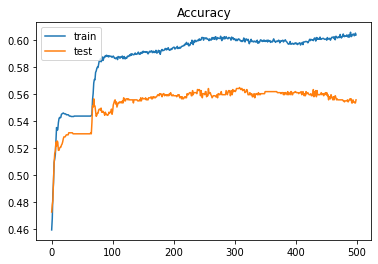

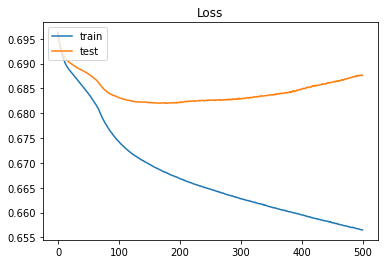

In [4]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()